<a href="https://colab.research.google.com/github/brunocu/DataScience/blob/master/MLintro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Machine Learning

Al trabajar en **Jupyter** usar `%matplotlib notebook` para visualizar gráficas interactivas o `%matplot inline`. En Python normal `plt.show`

[Scipy Lecture Notes](http://scipy-lectures.org/) <- Introducción a librerías matemáticas

In [0]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import mglearn
from IPython.display import display

## Numpy

<img src="https://proxy.duckduckgo.com/iu/?u=https%3A%2F%2Fnumfocus.org%2Fwp-content%2Fuploads%2F2016%2F07%2Fnumpy-logo-300.png&f=1" alt="Numpy" height="120">


```python
import numpy as np
```

Principal función de Numpy: Introduce arrays (matrices)

**Arrays**: Contenedor eficiente en memoria que proporciona operaciones numéricas rápidas.

Ejemplos de uso de matrices en Machine Learning:

- Valores de un experimento/simulación en pasos de tiempo discretos.
- Señal registrada por un dispositivo de medición, por ejemplo, una onda sonora.
- Píxeles de una imagen, nivel de gris o color.
- Datos 3D medidos en diferentes posiciones XYZ.

### Creación de Arrays

#### Espaciados uniformemente

In [0]:
a = np.arange(10) # 0 .. n-1  (!)
a

array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [0]:
b = np.arange(1, 9, 2) # start, end (exclusive), step
b

array([1, 3, 5, 7])

#### Por cantidad de puntos

In [0]:
c = np.linspace(0, 1, 6)   # start, end, num-points
c

array([0. , 0.2, 0.4, 0.6, 0.8, 1. ])

#### Matrices comunes

In [0]:
a = np.ones((3, 3))    # Matriz de (n, m) tamaño llena de 1
a

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

In [0]:
b = np.zeros((2, 2))    # Matriz de (n, m) tamaño llena de 0 (Matriz cero)
b

array([[0., 0.],
       [0., 0.]])

In [0]:
c = np.eye(3)    # Matriz identidad
c

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.]])

In [0]:
d = np.diag(np.array([1, 2, 3, 4]))    # Array diagonal que toma otra array como input
d

array([[1, 0, 0, 0],
       [0, 2, 0, 0],
       [0, 0, 3, 0],
       [0, 0, 0, 4]])

In [0]:
a = np.random.rand(4)    # Matriz 1D con valores al azar [0,1]
a

array([0.95595123, 0.26862446, 0.00926042, 0.5810484 ])

### Ejemplo: 1D Array

In [0]:
a = np.array([0, 1, 2, 3])
a

array([0, 1, 2, 3])

In [0]:
a.ndim

1

In [0]:
a.shape

(4,)

In [0]:
len(a)

4

### Ejemplo: 2D, 3D Array

In [0]:
b = np.array([[0, 1, 2], [3, 4, 5]])    # 2 x 3 array (array de arrays)
b

array([[0, 1, 2],
       [3, 4, 5]])

In [0]:
b.ndim

2

In [0]:
b.shape

(2, 3)

In [0]:

len(b)    # regresa el tamaño de la "primera" dimensión

2

## Array Visualization

### 1D Plotting

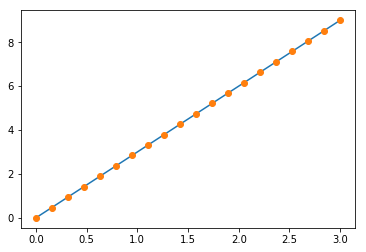

In [0]:
x = np.linspace(0, 3, 20)
y = np.linspace(0, 9, 20)
plt.plot(x, y)       # line plot    

plt.plot(x, y, 'o')  # dot plot

### 2D Plot

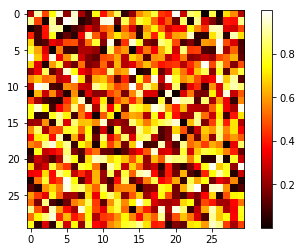

In [0]:
image = np.random.rand(30, 30)
plt.imshow(image, cmap=plt.cm.hot)    

plt.colorbar()